In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


## Подключение библиотек и пакетов

In [78]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split # для разделения набора данных на train и test
from sklearn.pipeline import make_pipeline # конвейр преобразований одного метода (использование различных модификаций, подгонка метода)
from sklearn.preprocessing import StandardScaler # для нормировки (масштабирования) ввода
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score # проверка обучения модели кросс-валидацией
from sklearn.metrics import confusion_matrix # для вычисления матрицы неточности
from sklearn.metrics import accuracy_score # для вычисления точности предсказывания
from sklearn.metrics import precision_score, recall_score, f1_score # для вычисления метрик (точность, полнота, F-мера и т.д.)
from sklearn.metrics import precision_recall_curve # для построения графика для определения влияния порога на оценку

# пакеты для построения кривых (точность, полнота и т.д.)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import SGDClassifier # линейные модели, использующие стохастический градиентный спуск 
from sklearn.neighbors import KNeighborsClassifier # для модели KNN (метод ближайших соседей)
from sklearn.svm import LinearSVC # для линейной модели SVM (метод опорных векторов)

# для визуализации данных
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

## Настройка pandas

In [3]:
# установка максимального количества столбцов и строк для вывода
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 25)

# установка количества знаков после запятой
pd.set_option("precision", 2)

## Просмотр первичных (сырых) данных

In [4]:
!wget 

# Чтение данных
df = pd.read_csv("../input/weather-dataset-rattle-package/weatherAUS.csv")
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [5]:
print(f'Количество строк: {df.shape[0]}')
print(f'Количество столбцов: {df.shape[1]}')
print(f'Вывод общей информации по датафрейму и признакам:\n')
print(df.info())

Количество строк: 145460
Количество столбцов: 23
Вывод общей информации по датафрейму и признакам:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    1303

In [6]:
# Вывод основных статистических характеристик по числовым признакам
df.describe()

MinTemp    MaxTemp   Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  143975.00  144199.00  142199.00     82670.00  75625.00      135197.00   
mean       12.19      23.22       2.36         5.47      7.61          40.04   
std         6.40       7.12       8.48         4.19      3.79          13.61   
min        -8.50      -4.80       0.00         0.00      0.00           6.00   
25%         7.60      17.90       0.00         2.60      4.80          31.00   
50%        12.00      22.60       0.00         4.80      8.40          39.00   
75%        16.90      28.20       0.80         7.40     10.60          48.00   
max        33.90      48.10     371.00       145.00     14.50         135.00   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count     143693.00     142398.00    142806.00    140953.00    130395.00   
mean          14.04         18.66        68.88        51.54      1017.65   
std            8.92          8.81        19.03        20.80         7.11   
min            0.00          0.00         0.00         0.00       980.50   
25%            7.00         13.00        57.00        37.00      1012.90   
50%           13.00         19.00        70.00        52.00      1017.60   
75%           19.00         24.00        83.00        66.00      1022.40   
max          130.00         87.00       100.00       100.00      1041.00   

       Pressure3pm  Cloud9am  Cloud3pm    Temp9am    Temp3pm  
count    130432.00  89572.00  86102.00  143693.00  141851.00  
mean       1015.26      4.45      4.51      16.99      21.68  
std           7.04      2.89      2.72       6.49       6.94  
min         977.10      0.00      0.00      -7.20      -5.40  
25%        1010.40      1.00      2.00      12.30      16.60  
50%        1015.20      5.00      5.00      16.70      21.10  
75%        1020.00      7.00      7.00      21.60      26.40  
max        1039.60      9.00      9.00      40.20      46.70

## Предварительная обработка данных (Data Preprocessing)
Узнаем какие признаки в каком количестве имеют пропуски

In [7]:
# функция получения статистики по пропущенным значениям признаков
# data - проверяемый набор данных (матрица признаковых описаний)
def get_missing_data_stats(data):
    # подсчет количества пропущеннных значений каждого принака
    feat_null_count = data.isnull().sum().sort_values(ascending=False)

    # подсчет пропущенных значений каждого признака в процентном соотношении от общего числа признаков
    feat_null_percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)

    # объединение статистики по пропущенным данным
    missing_data = pd.concat([feat_null_count, feat_null_percent], axis=1, keys=['Total', 'Percent'])

    # вывод статистики по пропущенным значениям
    missing_data.style.format("{:.2%}")
    return missing_data

In [8]:
missing_data = get_missing_data_stats(df)
missing_data

Total   Percent
Sunshine       69835  4.80e-01
Evaporation    62790  4.32e-01
Cloud3pm       59358  4.08e-01
Cloud9am       55888  3.84e-01
Pressure9am    15065  1.04e-01
Pressure3pm    15028  1.03e-01
WindDir9am     10566  7.26e-02
WindGustDir    10326  7.10e-02
WindGustSpeed  10263  7.06e-02
Humidity3pm     4507  3.10e-02
WindDir3pm      4228  2.91e-02
Temp3pm         3609  2.48e-02
RainTomorrow    3267  2.25e-02
Rainfall        3261  2.24e-02
RainToday       3261  2.24e-02
WindSpeed3pm    3062  2.11e-02
Humidity9am     2654  1.82e-02
Temp9am         1767  1.21e-02
WindSpeed9am    1767  1.21e-02
MinTemp         1485  1.02e-02
MaxTemp         1261  8.67e-03
Location           0  0.00e+00
Date               0  0.00e+00

Видно, что у признаков "Sunshine", "Evaporation", "Cloud3pm", "Cloud9am" больше 38% пропусков от общего объема данных. Узнаем в каких локациях наименьшее количество пропусков по данным признакам

In [9]:
# группируем данные по локациям и считаем количество пропусков для указанных признаков 
group = df[['Location', 'Sunshine', 'Evaporation', 
            'Cloud3pm', 'Cloud9am']].groupby(['Location']).apply(lambda x: x.isnull().sum())

# суммируем количество пропусков для каждой строки
row_sum = group[['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am']].sum(axis=1)

# выводим локации, у которых по указанным выше признакам в сумме меньше 100 пропусков
row_sum[row_sum < 100].sort_values()

Location
MelbourneAirport     5
Watsonia             5
Perth               12
PerthAirport        12
Darwin              62
SydneyAirport       66
Brisbane            71
dtype: int64

Меньше всего потерь данных в следующих локациях: Brisbane, Darwin, MelbourneAirport, Perth, PerthAirport, SydneyAirport, Watsonia. Узнаем сколько данных и в каком соотношении для каждой локации имеется

In [10]:
# получаем количество записей для каждой локации
locations_count = df['Location'].value_counts().rename_axis('Location').reset_index(name='LocationCount')

# строим условие вывода таблицы только для определенных локаций
locations_condition = ((locations_count['Location'] == 'Brisbane') | 
                       (locations_count['Location'] == 'Darwin') | 
                       (locations_count['Location'] == 'MelbourneAirport') | 
                       (locations_count['Location'] == 'Perth') | 
                       (locations_count['Location'] == 'PerthAirport') | 
                       (locations_count['Location'] == 'SydneyAirport') | 
                       (locations_count['Location'] == 'Watsonia'))
# выводим таблицу по условию 
locations_count[locations_condition]

Location  LocationCount
2             Darwin           3193
3              Perth           3193
5           Brisbane           3193
27      PerthAirport           3009
30          Watsonia           3009
34  MelbourneAirport           3009
42     SydneyAirport           3009

Для каждой выбранной локации почти одинаковое количество записей, значит нет дисбаланса. Возьмем эти самые данные

In [11]:
locations_condition = ((df['Location'] == 'Brisbane') | 
                       (df['Location'] == 'Darwin') | 
                       (df['Location'] == 'MelbourneAirport') | 
                       (df['Location'] == 'Perth') | 
                       (df['Location'] == 'PerthAirport') | 
                       (df['Location'] == 'SydneyAirport') | 
                       (df['Location'] == 'Watsonia'))

df = df[locations_condition]
df.head()

Date       Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
33520  2009-01-01  SydneyAirport     17.7     35.1       0.0          9.8   
33521  2009-01-02  SydneyAirport     18.5     23.0       0.0         11.0   
33522  2009-01-03  SydneyAirport     16.9     23.2       0.0          9.0   
33523  2009-01-04  SydneyAirport     18.7     27.1       0.0          5.4   
33524  2009-01-05  SydneyAirport     20.2     31.6       0.0         10.0   

       Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
33520      12.9           S           72.0         NW         NW   
33521       5.9           S           63.0        SSE         SE   
33522       0.5         NaN            NaN        ESE        ENE   
33523      11.3          NE           65.0        NNE         NE   
33524      12.2         NNE           63.0        WNW         NE   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
33520          15.0          33.0         63.0         13.0       1005.3   
33521          15.0          35.0         63.0         58.0       1012.9   
33522          15.0          17.0         52.0         50.0       1021.8   
33523          24.0          48.0         60.0         51.0       1018.5   
33524          11.0          35.0         58.0         52.0       1013.2   

       Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
33520       1000.2       6.0       6.0     22.9     34.0        No   
33521       1014.1       5.0       6.0     20.6     20.1        No   
33522       1019.4       7.0       8.0     18.9     22.0        No   
33523       1014.9       2.0       1.0     22.9     25.9        No   
33524       1008.0       6.0       3.0     24.9     29.0        No   

      RainTomorrow  
33520           No  
33521           No  
33522           No  
33523           No  
33524           No

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21615 entries, 33520 to 142303
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           21615 non-null  object 
 1   Location       21615 non-null  object 
 2   MinTemp        21597 non-null  float64
 3   MaxTemp        21599 non-null  float64
 4   Rainfall       21569 non-null  float64
 5   Evaporation    21488 non-null  float64
 6   Sunshine       21534 non-null  float64
 7   WindGustDir    21374 non-null  object 
 8   WindGustSpeed  21378 non-null  float64
 9   WindDir9am     21104 non-null  object 
 10  WindDir3pm     21518 non-null  object 
 11  WindSpeed9am   21605 non-null  float64
 12  WindSpeed3pm   21601 non-null  float64
 13  Humidity9am    21577 non-null  float64
 14  Humidity3pm    21576 non-null  float64
 15  Pressure9am    21600 non-null  float64
 16  Pressure3pm    21600 non-null  float64
 17  Cloud9am       21605 non-null  float64
 18  C

In [13]:
get_missing_data_stats(df)

Total   Percent
WindDir9am       511  2.36e-02
WindGustDir      241  1.11e-02
WindGustSpeed    237  1.10e-02
Evaporation      127  5.88e-03
WindDir3pm        97  4.49e-03
Sunshine          81  3.75e-03
RainTomorrow      47  2.17e-03
Rainfall          46  2.13e-03
RainToday         46  2.13e-03
Humidity3pm       39  1.80e-03
Humidity9am       38  1.76e-03
Temp3pm           20  9.25e-04
Temp9am           19  8.79e-04
MinTemp           18  8.33e-04
MaxTemp           16  7.40e-04
Pressure9am       15  6.94e-04
Pressure3pm       15  6.94e-04
Cloud3pm          15  6.94e-04
WindSpeed3pm      14  6.48e-04
WindSpeed9am      10  4.63e-04
Cloud9am          10  4.63e-04
Location           0  0.00e+00
Date               0  0.00e+00

Попробуем "восстановить" пропущенные данные. Для этого для каждой недели расчитаем среднее значение для всех числовых данных и заполним ими пропуски в соответствующих неделях

In [14]:
# списки используемых колонок
categ_feat = ['Date','Location','WindGustDir','WindDir9am','WindDir3pm', 'RainToday']
quant_feat = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed',
              'WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am',
              'Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']
quant_feat_group = np.char.add(np.array(("Group")), np.array(quant_feat)).tolist()

# преобразование переменной "Date" в тип даты, т. к. пропусков не имеет
df['Date'] = df['Date'].astype('datetime64')

In [15]:
# функция восстановления данных средними значениями за указанный период времени
# - набор данных
# - названия колонок числовых значений
# - названия колонок числовых значений для группировок
# - временной промежуток, по которому рассчитывается среднее значение и записывается вместо пропуска
def quant_data_recovery(df, quant_feat,quant_feat_group,data_group_freq='M'):
    # группировка набора данных по локации и повременному отрезку
    df_group = df.groupby(['Location', pd.Grouper(key='Date', freq=data_group_freq)])
    
    # создание нового датафрейма: df + df_grouped 
    df_joined = df

    for i in range(len(quant_feat)):
        df_joined[quant_feat_group[i]] = df_group[quant_feat[i]].transform('mean')
        
    # перезапись NaN данных:
    for i in range(len(quant_feat)):
        df_joined.loc[df_joined[quant_feat[i]].isna(), 
                      quant_feat[i]] = df_joined.loc[df_joined[quant_feat[i]].isna(), quant_feat_group[i]]
        
    # Удаление столбцов ненужных
    df_joined = df_joined.drop(quant_feat_group, axis=1)
    
    return df_joined;

In [16]:
# восстанавливаем данные указывая в качестве промежутка 1 неделю
df = quant_data_recovery(df, quant_feat,quant_feat_group,data_group_freq='W')

# выводим количество оставшихся пропусков
get_missing_data_stats(df)

Total   Percent
WindDir9am       511  2.36e-02
WindGustDir      241  1.11e-02
WindDir3pm        97  4.49e-03
RainTomorrow      47  2.17e-03
RainToday         46  2.13e-03
Humidity3pm        7  3.24e-04
Evaporation        7  3.24e-04
Humidity9am        7  3.24e-04
Temp3pm            0  0.00e+00
Temp9am            0  0.00e+00
Cloud3pm           0  0.00e+00
Cloud9am           0  0.00e+00
Pressure3pm        0  0.00e+00
Pressure9am        0  0.00e+00
Date               0  0.00e+00
WindSpeed3pm       0  0.00e+00
Location           0  0.00e+00
WindGustSpeed      0  0.00e+00
Sunshine           0  0.00e+00
Rainfall           0  0.00e+00
MaxTemp            0  0.00e+00
MinTemp            0  0.00e+00
WindSpeed9am       0  0.00e+00

Оставшиеся пропуски можно просто удалить, но сначала переведем признак "RainToday", и целевой признак "RainTomorrow" в бинарный тип

In [17]:
# замена оставшихся признаков с типом oject на признаки с типом str
df['RainToday'] = df['RainToday'].astype(str)
df['RainTomorrow'] = df['RainTomorrow'].astype(str)

# таким образом избавляемся от пропусков в признаке и ответе
get_missing_data_stats(df)

Total   Percent
WindDir9am       511  2.36e-02
WindGustDir      241  1.11e-02
WindDir3pm        97  4.49e-03
Humidity3pm        7  3.24e-04
Evaporation        7  3.24e-04
Humidity9am        7  3.24e-04
Date               0  0.00e+00
RainToday          0  0.00e+00
Temp3pm            0  0.00e+00
Temp9am            0  0.00e+00
Cloud3pm           0  0.00e+00
Cloud9am           0  0.00e+00
Pressure3pm        0  0.00e+00
Pressure9am        0  0.00e+00
WindSpeed9am       0  0.00e+00
WindSpeed3pm       0  0.00e+00
Location           0  0.00e+00
WindGustSpeed      0  0.00e+00
Sunshine           0  0.00e+00
Rainfall           0  0.00e+00
MaxTemp            0  0.00e+00
MinTemp            0  0.00e+00
RainTomorrow       0  0.00e+00

In [18]:
# создание объект для бинаризации признака с типом str 
lb = preprocessing.LabelBinarizer()

# приведение признака и ответа к бинарному числовому виду
df['RainToday'] = lb.fit_transform(df['RainToday'])
df['RainTomorrow'] = lb.fit_transform(df['RainTomorrow'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21615 entries, 33520 to 142303
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           21615 non-null  datetime64[ns]
 1   Location       21615 non-null  object        
 2   MinTemp        21615 non-null  float64       
 3   MaxTemp        21615 non-null  float64       
 4   Rainfall       21615 non-null  float64       
 5   Evaporation    21608 non-null  float64       
 6   Sunshine       21615 non-null  float64       
 7   WindGustDir    21374 non-null  object        
 8   WindGustSpeed  21615 non-null  float64       
 9   WindDir9am     21104 non-null  object        
 10  WindDir3pm     21518 non-null  object        
 11  WindSpeed9am   21615 non-null  float64       
 12  WindSpeed3pm   21615 non-null  float64       
 13  Humidity9am    21608 non-null  float64       
 14  Humidity3pm    21608 non-null  float64       
 15  Pressure9am   

Осталось 4 признака с типом object: "Location", "WindGistDir", "WindDir9am", "WindDir3pm". Их значения нужно будет трансформировать в новые бинарные признаки через one-hot-encoding

In [19]:
# удаление строк, в которых имеются пропуски
df = df.dropna()

# вывод статистики по пропущенным значениям признаков
get_missing_data_stats(df)

Total  Percent
Date               0      0.0
WindSpeed3pm       0      0.0
RainToday          0      0.0
Temp3pm            0      0.0
Temp9am            0      0.0
Cloud3pm           0      0.0
Cloud9am           0      0.0
Pressure3pm        0      0.0
Pressure9am        0      0.0
Humidity3pm        0      0.0
Humidity9am        0      0.0
WindSpeed9am       0      0.0
Location           0      0.0
WindDir3pm         0      0.0
WindDir9am         0      0.0
WindGustSpeed      0      0.0
WindGustDir        0      0.0
Sunshine           0      0.0
Evaporation        0      0.0
Rainfall           0      0.0
MaxTemp            0      0.0
MinTemp            0      0.0
RainTomorrow       0      0.0

## Визуализация данных

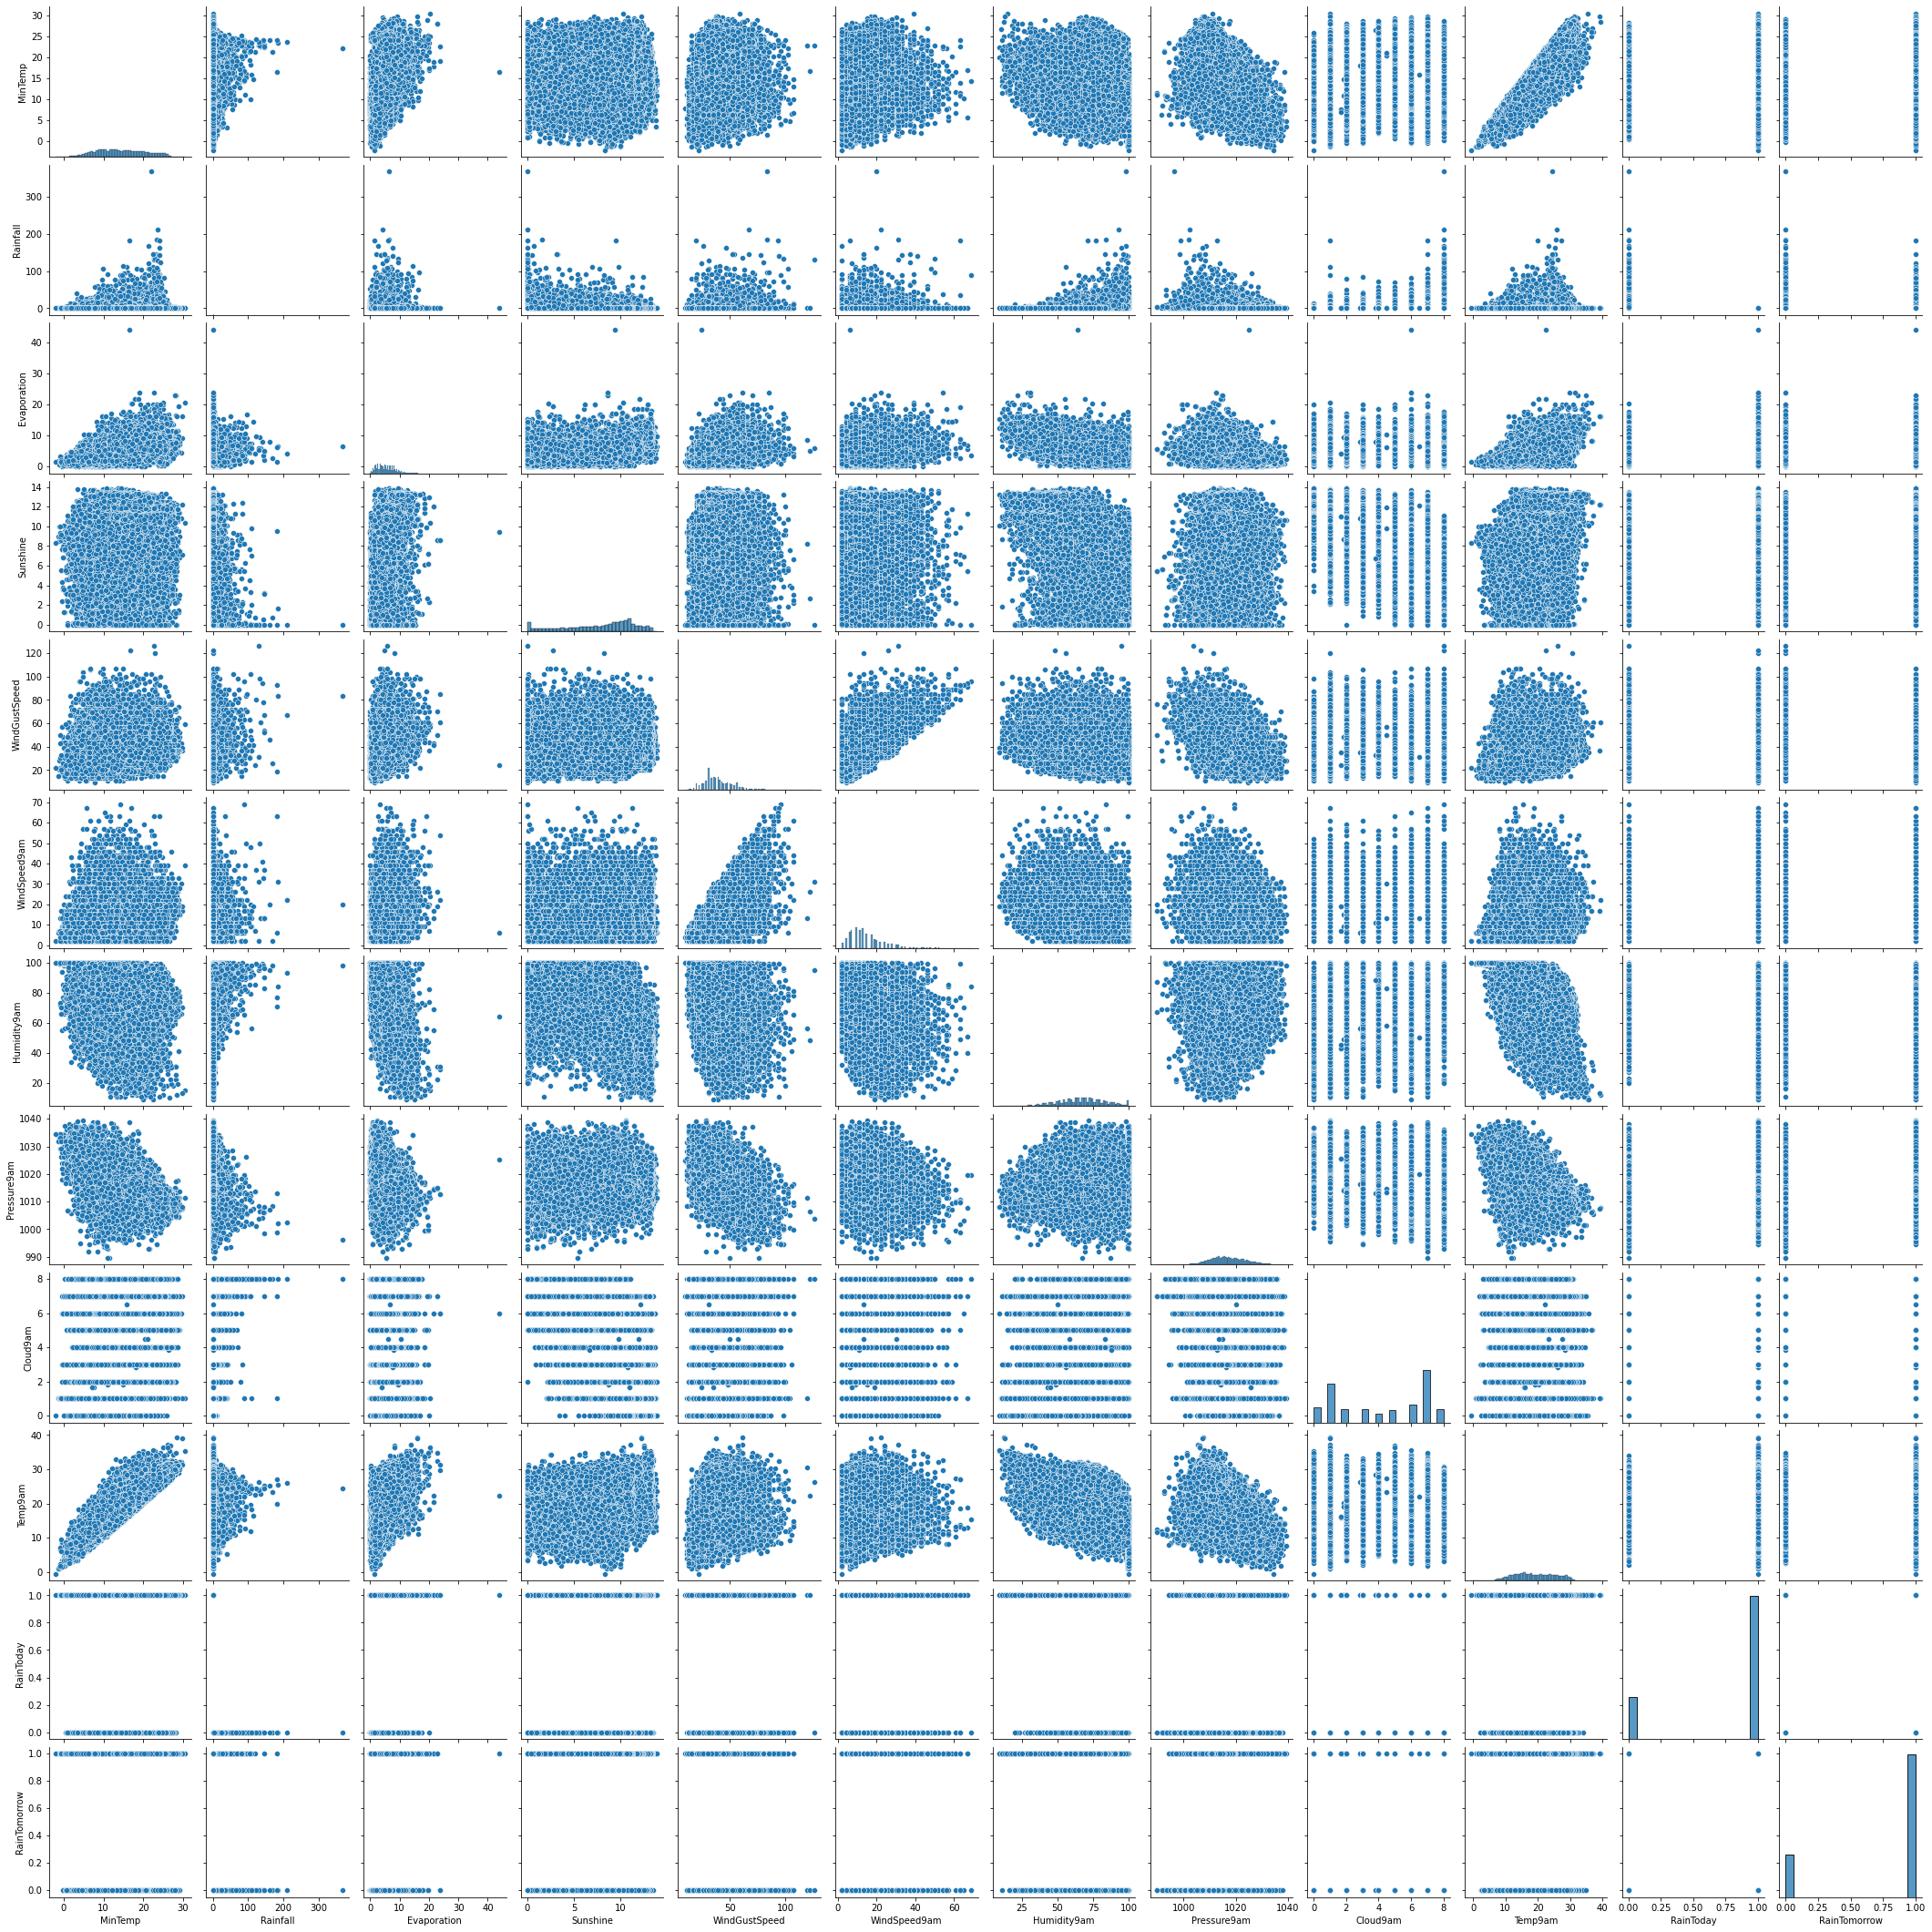

In [20]:
# вывод связи данных утренних измерений
sns.pairplot(
    df[['MinTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 
        'WindSpeed9am', 'Humidity9am', 'Pressure9am', 'Cloud9am', 'Temp9am', 
        'RainToday', 'RainTomorrow']]
);

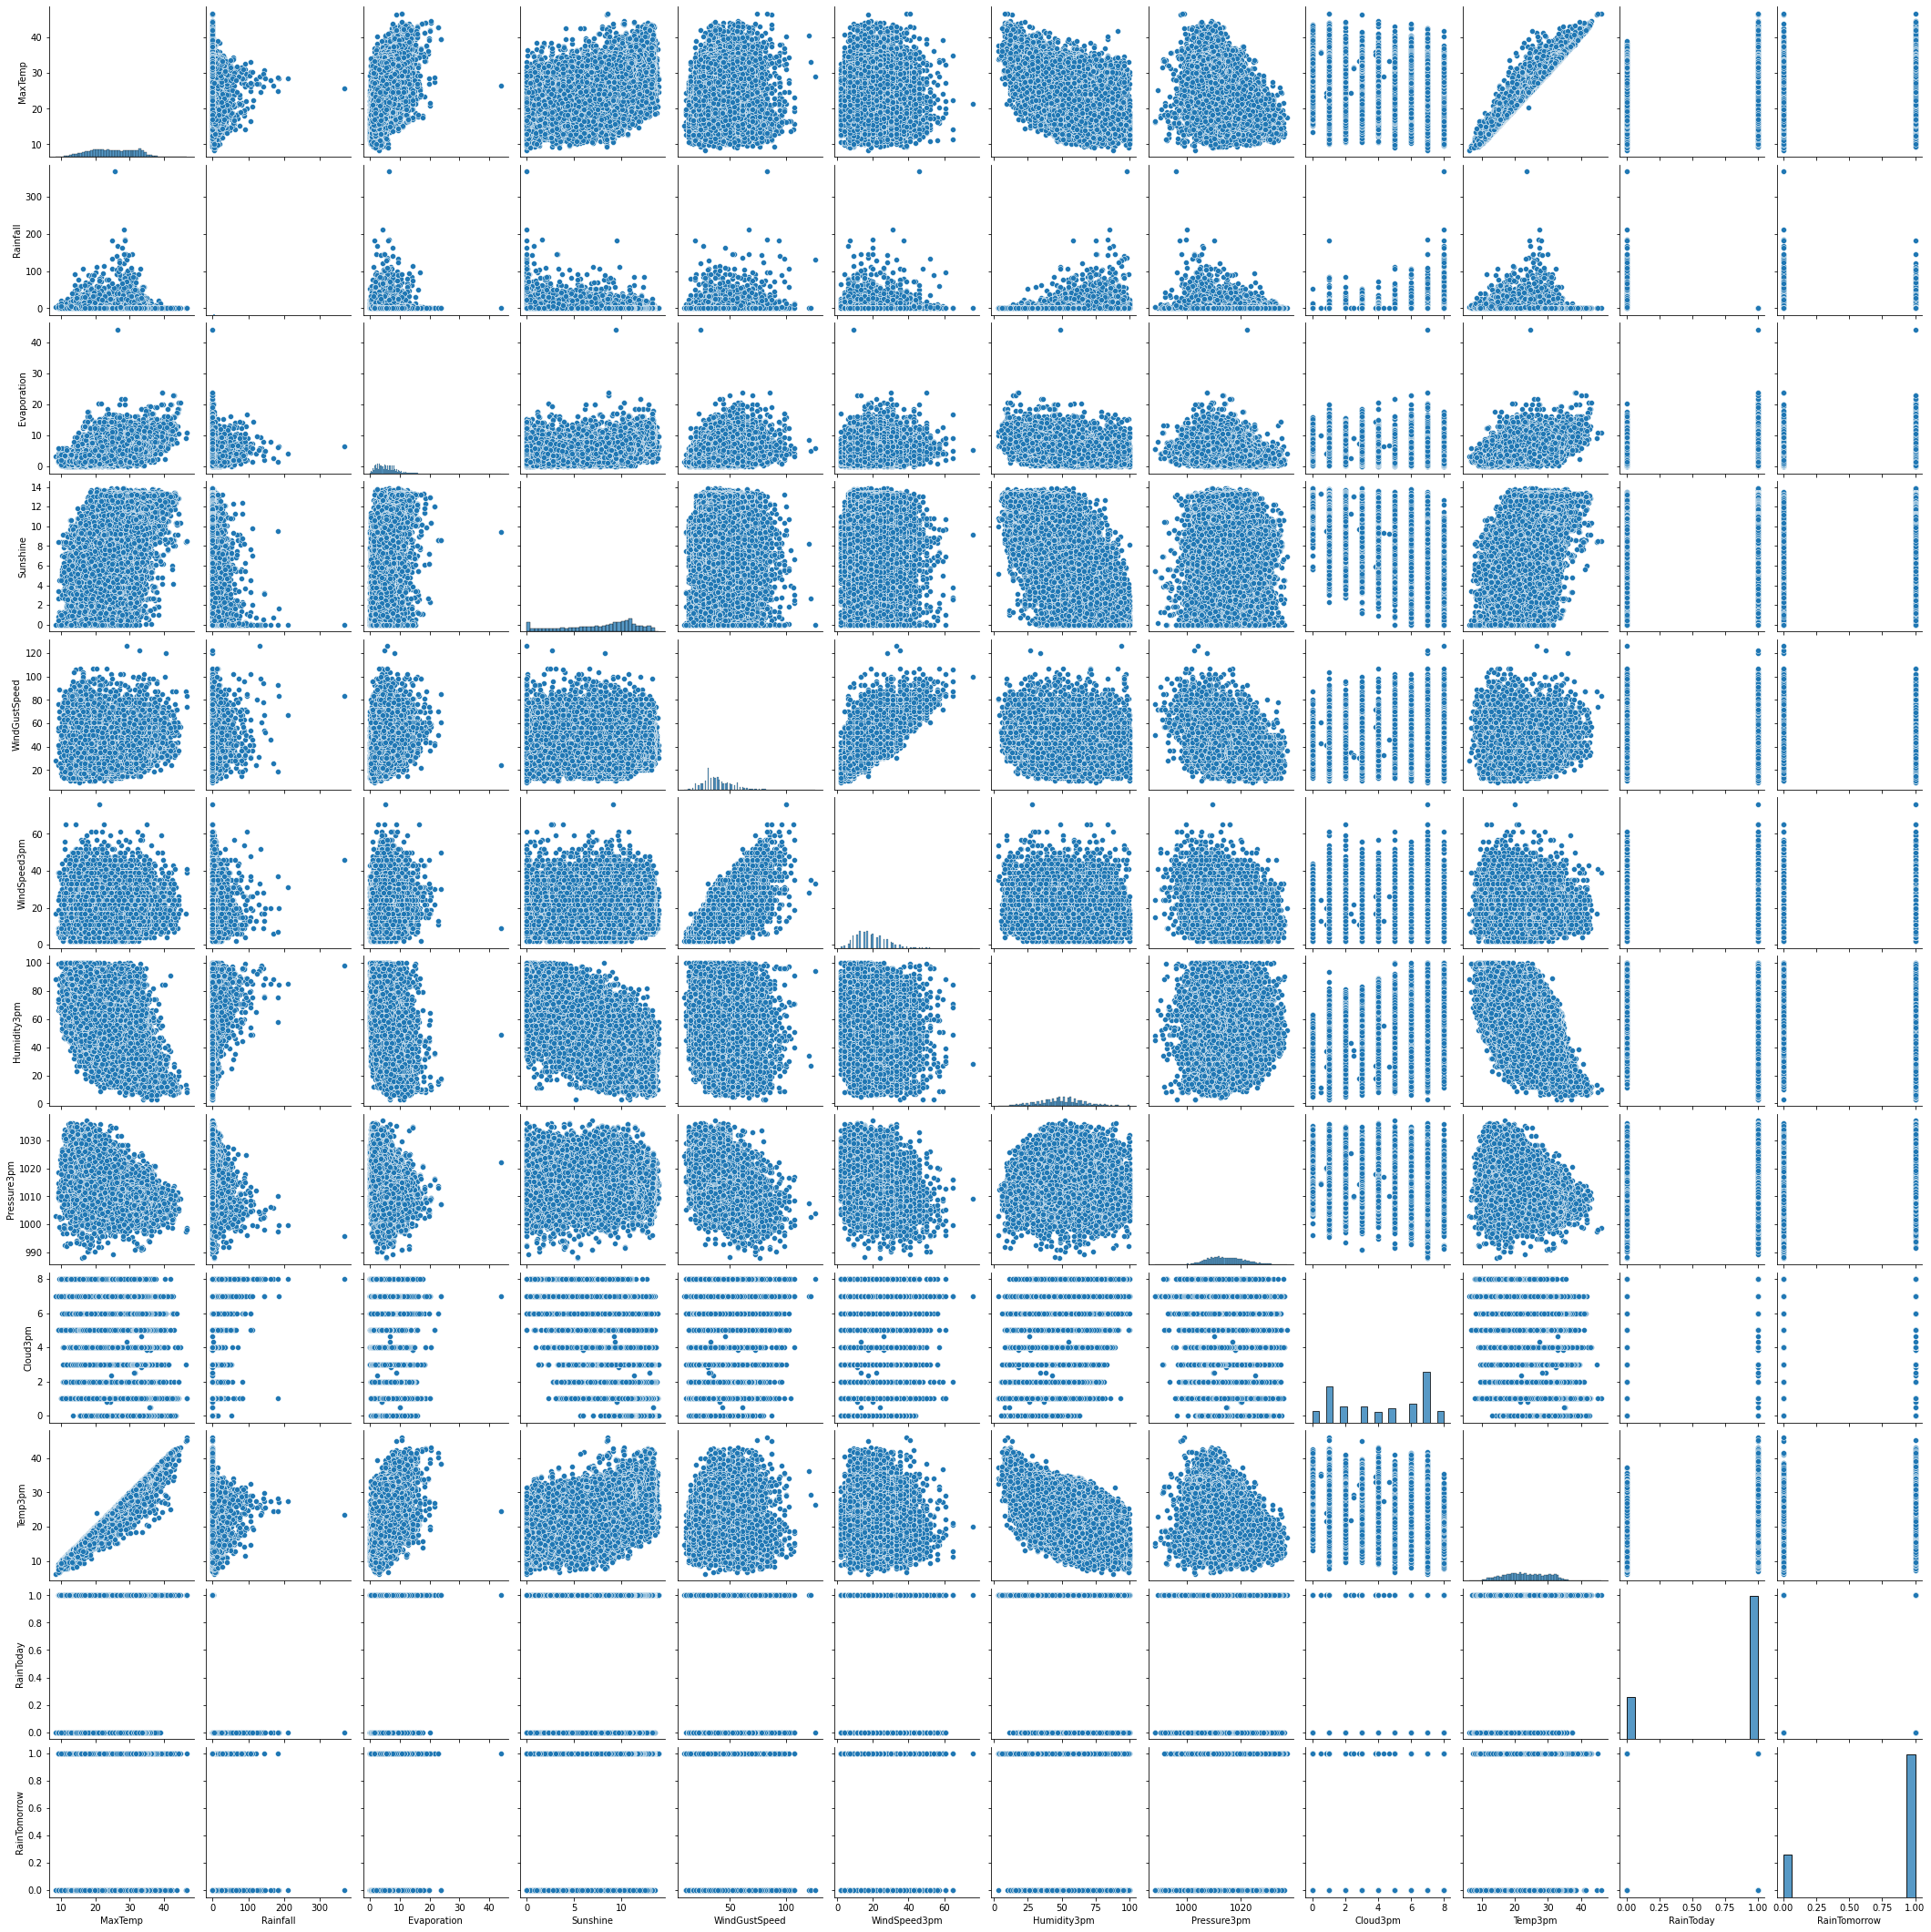

In [21]:
# вывод связи данных дневных измерений
sns.pairplot(
    df[['MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed3pm', 'Humidity3pm', 
        'Pressure3pm', 'Cloud3pm', 'Temp3pm', 'RainToday', 'RainTomorrow']]
);

Есть признаки, которые имеют линейную зависимость. Посмотрим другие графики

In [39]:
# вывод среднегодовой статистики
df_year_mean = df.resample('Y', on='Date').mean()
# df_year_mean_piv = df_year_mean.pivot(index=df_year_mean.index, columns='Year')
df_year_mean['Year'] = df_year_mean.index
df_year_mean

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
Date                                                                           
2008-12-31    15.91    26.70      2.70         5.59      8.58          36.64   
2009-12-31    14.31    25.15      2.31         5.57      7.98          41.55   
2010-12-31    14.35    24.81      2.97         5.20      7.54          39.96   
2011-12-31    14.38    24.61      3.33         5.17      7.45          40.47   
2012-12-31    13.80    24.45      2.46         5.11      7.78          40.03   
2013-12-31    14.24    24.83      2.49         5.37      7.90          40.67   
2014-12-31    14.60    25.37      2.07         5.69      7.93          40.26   
2015-12-31    14.39    25.21      2.43         5.60      7.89          39.88   
2016-12-31    14.66    25.00      2.36         5.55      7.80          40.61   
2017-12-31    15.75    26.47      3.42         5.61      7.82          37.86   

            WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
Date                                                                            
2008-12-31         11.82         17.17        62.72        48.95      1016.54   
2009-12-31         14.84         20.01        65.47        48.59      1016.36   
2010-12-31         14.64         18.80        66.40        51.45      1017.34   
2011-12-31         14.73         18.71        67.54        51.91      1016.44   
2012-12-31         14.63         18.63        66.48        50.25      1017.22   
2013-12-31         14.65         19.32        65.80        50.65      1016.55   
2014-12-31         14.47         19.23        65.62        49.60      1017.44   
2015-12-31         14.27         18.91        65.95        49.45      1018.63   
2016-12-31         14.36         19.09        66.07        50.73      1016.48   
2017-12-31         13.49         17.35        68.65        51.92      1017.33   

            Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
Date                                                                       
2008-12-31      1013.45      3.68      3.73    21.14    25.13       0.78   
2009-12-31      1013.84      4.10      4.03    18.94    23.60       0.78   
2010-12-31      1014.82      4.36      4.56    19.00    23.31       0.76   
2011-12-31      1014.00      4.43      4.51    18.95    23.11       0.74   
2012-12-31      1014.64      4.26      4.31    18.54    22.96       0.77   
2013-12-31      1014.04      4.15      4.27    19.03    23.20       0.77   
2014-12-31      1014.87      4.25      4.15    19.40    23.79       0.79   
2015-12-31      1016.06      4.10      4.11    19.17    23.62       0.79   
2016-12-31      1013.94      4.28      4.25    19.31    23.41       0.76   
2017-12-31      1014.87      4.10      4.06    20.21    24.94       0.78   

            RainTomorrow       Year  
Date                                 
2008-12-31          0.78 2008-12-31  
2009-12-31          0.78 2009-12-31  
2010-12-31          0.76 2010-12-31  
2011-12-31          0.74 2011-12-31  
2012-12-31          0.77 2012-12-31  
2013-12-31          0.78 2013-12-31  
2014-12-31          0.79 2014-12-31  
2015-12-31          0.79 2015-12-31  
2016-12-31          0.75 2016-12-31  
2017-12-31          0.78 2017-12-31

<AxesSubplot:title={'center':'Average Annual Temperature'}, xlabel='Year', ylabel='Temp'>

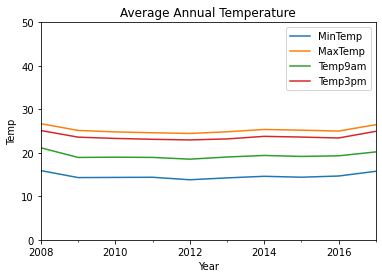

In [66]:
# вывод среднегодовой температуры
df_year_mean['MinTemp'].plot(legend=True)
df_year_mean['MaxTemp'].plot(legend=True)
df_year_mean['Temp9am'].plot(legend=True)
df_year_mean['Temp3pm'].plot(ylim=(0, 50), ylabel='Temp', 
                             title='Average Temperature', legend=True)

<AxesSubplot:title={'center':'Average Annual Wind Speed'}, xlabel='Year', ylabel='Wind Speed'>

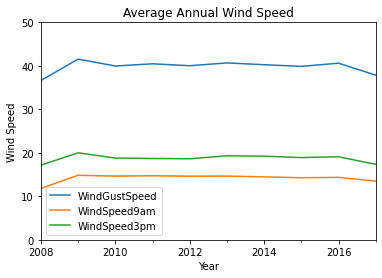

In [65]:
# вывод среднегодового порыва ветра
df_year_mean['WindGustSpeed'].plot(legend=True)
df_year_mean['WindSpeed9am'].plot(legend=True)
df_year_mean['WindSpeed3pm'].plot(ylim=(0, 50), ylabel='Wind Speed', 
                                  title='Average Wind Speed', legend=True)

<AxesSubplot:title={'center':'Average Annual Rainfall and Evaporation'}, xlabel='Year', ylabel='Rainfall and Evaporation'>

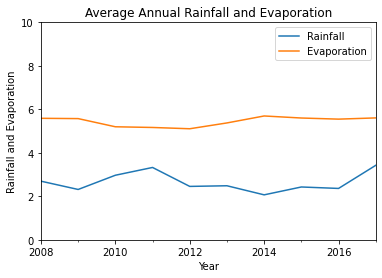

In [64]:
# вывод среднегодовых осадков и испарений
df_year_mean['Rainfall'].plot(legend=True)
df_year_mean['Evaporation'].plot(ylim=(0, 10), ylabel='Rainfall and Evaporation', 
                                 title='Average Rainfall and Evaporation', legend=True)

Среднегодовые измерения имеют максмальную амплитуду в 3 значения, а это значит особых колебаний в течении года для каких-либо признаков не было. Поэтому признак "Date" можно удалить из выборки данных. 

Посмотрим средние знаения измерений для конкретных локаций

In [67]:
df_loaction_mean = df.groupby('Location').mean()
df_loaction_mean

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
Location                                                              
Brisbane            16.43    26.48      3.05         5.46      8.17   
Darwin              23.17    32.54      5.03         6.31      8.54   
MelbourneAirport     9.97    20.51      1.47         4.67      6.42   
Perth               13.08    25.21      1.84         5.73      8.87   
PerthAirport        12.68    25.61      1.74         5.71      8.81   
SydneyAirport       14.90    23.39      3.00         5.26      7.19   
Watsonia            10.21    21.00      1.86         4.77      6.49   

                  WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
Location                                                                   
Brisbane                  28.35          7.12         11.13        63.66   
Darwin                    40.58         15.17         20.86        68.32   
MelbourneAirport          47.23         20.55         23.28        69.92   
Perth                     35.22         11.17         14.68        61.82   
PerthAirport              44.36         17.99         21.36        58.53   
SydneyAirport             47.26         18.60         25.80        64.74   
Watsonia                  38.91         10.63         15.66        77.26   

                  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
Location                                                                      
Brisbane                53.55      1018.26      1015.15      3.87      3.84   
Darwin                  51.59      1011.93      1008.38      4.31      4.29   
MelbourneAirport        50.97      1018.03      1016.23      5.24      5.26   
Perth                   46.64      1017.63      1015.25      3.35      3.43   
PerthAirport            41.88      1017.76      1015.25      3.39      3.46   
SydneyAirport           53.89      1018.38      1015.98      4.28      4.28   
Watsonia                54.15      1017.76      1015.84      5.19      5.26   

                  Temp9am  Temp3pm  RainToday  RainTomorrow  
Location                                                     
Brisbane            21.87    24.78       0.77          0.78  
Darwin              27.16    31.09       0.74          0.74  
MelbourneAirport    14.14    18.97       0.78          0.78  
Perth               18.76    23.61       0.81          0.80  
PerthAirport        18.87    24.16       0.81          0.81  
SydneyAirport       18.55    21.78       0.74          0.74  
Watsonia            13.92    19.48       0.75          0.75

<AxesSubplot:title={'center':'Average Annual Temperature'}, xlabel='Location', ylabel='Temp'>

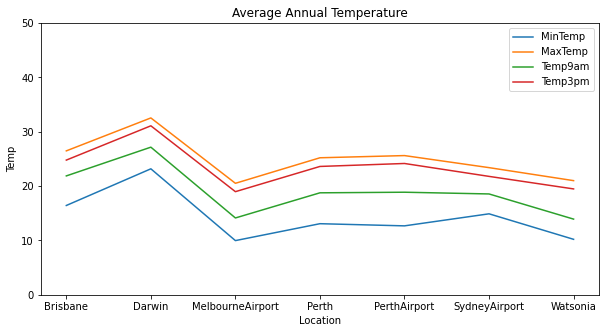

In [71]:
# вывод средних показателей температуры для каждой локации
df_loaction_mean['MinTemp'].plot(legend=True)
df_loaction_mean['MaxTemp'].plot(legend=True)
df_loaction_mean['Temp9am'].plot(legend=True)
df_loaction_mean['Temp3pm'].plot(ylim=(0, 50), ylabel='Temp', figsize=(10, 5),
                                 title='Average Temperature', legend=True)

<AxesSubplot:title={'center':'Average Annual Wind Speed'}, xlabel='Location', ylabel='Wind Speed'>

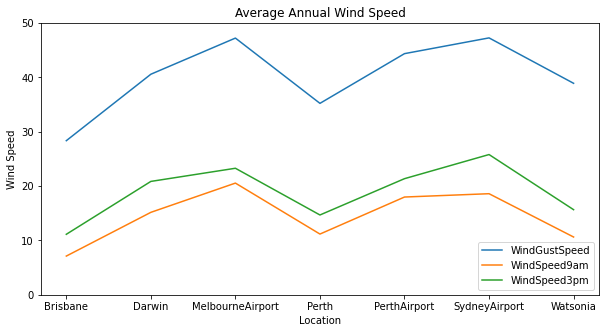

In [72]:
# вывод средних показателей порыва ветра для каждой локации
df_loaction_mean['WindGustSpeed'].plot(legend=True)
df_loaction_mean['WindSpeed9am'].plot(legend=True)
df_loaction_mean['WindSpeed3pm'].plot(ylim=(0, 50), ylabel='Wind Speed', figsize=(10, 5),
                                      title='Average Wind Speed', legend=True)

<AxesSubplot:title={'center':'Average Rainfall and Evaporation'}, xlabel='Location', ylabel='Rainfall and Evaporation'>

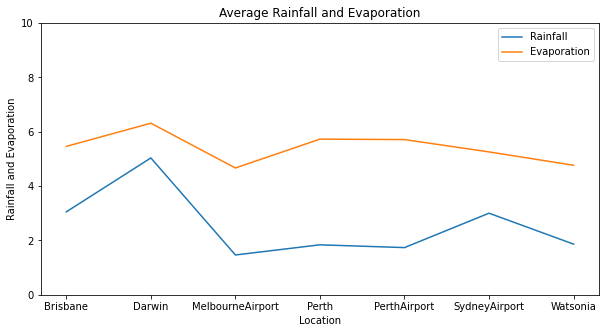

In [74]:
# вывод средних показателей осадков и испарений для каждой локации
df_loaction_mean['Rainfall'].plot(legend=True)
df_loaction_mean['Evaporation'].plot(ylim=(0, 10), ylabel='Rainfall and Evaporation', figsize=(10, 5),
                                     title='Average Rainfall and Evaporation', legend=True)

Как видно, что в каждой локации свой клематический режим, в некоторых из которых он сильно отличается от других. Значит, категориальный признак "Location" имеет смысл оставить преобразовав его значения в новые бинарные признаки.

## Предварительная обработка данных (Data Preprocessing). Продолжение

Перед началом машинного обучения осталось сделать следующее:
- удалить признак "Date", так как данный признак особой роли не играет 
- Значения признаков "Location", "WindGistDir", "WindDir9am", "WindDir3pm" трансформировать в новые бинарные признаки через one-hot-encoding
- разбить данные на матрицу признаковых описаний (x) и ответы (y)
- привести значения признаков (х) к масштабу от 0 до 1
- разбить данные на x_train, y_train и x_test, y_test

In [75]:
# удаление признака 'Date' из набора данных
df.drop(['Date'], axis=1, inplace=True)

# конвертирование значений у котегориальных признаков в новые бинарные признаки используя метод one-hot-encoding
df_ohe = pd.get_dummies(data=df, columns=['Location', 'WindGustDir','WindDir9am','WindDir3pm'])

# вывод информации по признакам
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20782 entries, 33520 to 142302
Data columns (total 73 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MinTemp                    20782 non-null  float64
 1   MaxTemp                    20782 non-null  float64
 2   Rainfall                   20782 non-null  float64
 3   Evaporation                20782 non-null  float64
 4   Sunshine                   20782 non-null  float64
 5   WindGustSpeed              20782 non-null  float64
 6   WindSpeed9am               20782 non-null  float64
 7   WindSpeed3pm               20782 non-null  float64
 8   Humidity9am                20782 non-null  float64
 9   Humidity3pm                20782 non-null  float64
 10  Pressure9am                20782 non-null  float64
 11  Pressure3pm                20782 non-null  float64
 12  Cloud9am                   20782 non-null  float64
 13  Cloud3pm                   20782 non-null

In [76]:
df_ohe.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
33520     17.7     35.1       0.0          9.8      12.9           72.0   
33521     18.5     23.0       0.0         11.0       5.9           63.0   
33523     18.7     27.1       0.0          5.4      11.3           65.0   
33524     20.2     31.6       0.0         10.0      12.2           63.0   
33525     19.9     29.7       0.0         10.0      11.8           41.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
33520          15.0          33.0         63.0         13.0       1005.3   
33521          15.0          35.0         63.0         58.0       1012.9   
33523          24.0          48.0         60.0         51.0       1018.5   
33524          11.0          35.0         58.0         52.0       1013.2   
33525          19.0          20.0         82.0         54.0       1011.7   

       Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
33520       1000.2       6.0       6.0     22.9     34.0          1   
33521       1014.1       5.0       6.0     20.6     20.1          1   
33523       1014.9       2.0       1.0     22.9     25.9          1   
33524       1008.0       6.0       3.0     24.9     29.0          1   
33525       1007.8       1.0       1.0     22.7     28.7          1   

       RainTomorrow  Location_Brisbane  Location_Darwin  \
33520             1                  0                0   
33521             1                  0                0   
33523             1                  0                0   
33524             1                  0                0   
33525             1                  0                0   

       Location_MelbourneAirport  Location_Perth  Location_PerthAirport  \
33520                          0               0                      0   
33521                          0               0                      0   
33523                          0               0                      0   
33524                          0               0                      0   
33525                          0               0                      0   

       Location_SydneyAirport  Location_Watsonia  WindGustDir_E  \
33520                       1                  0              0   
33521                       1                  0              0   
33523                       1                  0              0   
33524                       1                  0              0   
33525                       1                  0              0   

       WindGustDir_ENE  WindGustDir_ESE  WindGustDir_N  WindGustDir_NE  \
33520                0                0              0               0   
33521                0                0              0               0   
33523                0                0              0               1   
33524                0                0              0               0   
33525                0                0              0               1   

       WindGustDir_NNE  WindGustDir_NNW  WindGustDir_NW  WindGustDir_S  \
33520                0                0               0              1   
33521                0                0               0              1   
33523                0                0               0              0   
33524                1                0               0              0   
33525                0                0               0              0   

       WindGustDir_SE  WindGustDir_SSE  WindGustDir_SSW  WindGustDir_SW  \
33520               0                0                0               0   
33521               0                0                0               0   
33523               0                0                0               0   
33524               0                0                0               0   
33525               0                0                0               0   

       WindGustDir_W  WindGustDir_WNW  WindGustDir_WSW  WindDir9am_E  \
33520              0                0             

In [79]:
# масштабирование данных к 1
scaler = MinMaxScaler()
scaler_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                  'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 
                  'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
df_ohe[scaler_columns] = scaler.fit_transform(df_ohe[scaler_columns])
df_ohe.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
33520     0.61     0.70       0.0         0.22      0.93           0.54   
33521     0.63     0.38       0.0         0.25      0.42           0.46   
33523     0.64     0.49       0.0         0.12      0.81           0.48   
33524     0.68     0.60       0.0         0.23      0.88           0.46   
33525     0.67     0.55       0.0         0.23      0.85           0.27   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
33520          0.19          0.42         0.59         0.10         0.31   
33521          0.19          0.45         0.59         0.57         0.47   
33523          0.33          0.62         0.56         0.49         0.58   
33524          0.13          0.45         0.54         0.51         0.47   
33525          0.25          0.24         0.80         0.53         0.44   

       Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
33520         0.25      0.75      0.75     0.59     0.70          1   
33521         0.53      0.62      0.75     0.53     0.35          1   
33523         0.55      0.25      0.12     0.59     0.49          1   
33524         0.41      0.75      0.38     0.64     0.57          1   
33525         0.40      0.12      0.12     0.58     0.56          1   

       RainTomorrow  Location_Brisbane  Location_Darwin  \
33520             1                  0                0   
33521             1                  0                0   
33523             1                  0                0   
33524             1                  0                0   
33525             1                  0                0   

       Location_MelbourneAirport  Location_Perth  Location_PerthAirport  \
33520                          0               0                      0   
33521                          0               0                      0   
33523                          0               0                      0   
33524                          0               0                      0   
33525                          0               0                      0   

       Location_SydneyAirport  Location_Watsonia  WindGustDir_E  \
33520                       1                  0              0   
33521                       1                  0              0   
33523                       1                  0              0   
33524                       1                  0              0   
33525                       1                  0              0   

       WindGustDir_ENE  WindGustDir_ESE  WindGustDir_N  WindGustDir_NE  \
33520                0                0              0               0   
33521                0                0              0               0   
33523                0                0              0               1   
33524                0                0              0               0   
33525                0                0              0               1   

       WindGustDir_NNE  WindGustDir_NNW  WindGustDir_NW  WindGustDir_S  \
33520                0                0               0              1   
33521                0                0               0              1   
33523                0                0               0              0   
33524                1                0               0              0   
33525                0                0               0              0   

       WindGustDir_SE  WindGustDir_SSE  WindGustDir_SSW  WindGustDir_SW  \
33520               0                0                0               0   
33521               0                0                0               0   
33523               0                0                0               0   
33524               0                0                0               0   
33525               0                0                0               0   

       WindGustDir_W  WindGustDir_WNW  WindGustDir_WSW  WindDir9am_E  \
33520              0                0             

In [80]:
# разделение данных на ответы (y) и объекты с описанием признаков (x) 
y = df_ohe['RainTomorrow']
x = df_ohe.drop(['RainTomorrow'], axis=1)

In [81]:
# разделение выборок на обучающую и тестовую в соотношении 75/25
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [83]:
x_train.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
121756     0.30     0.33  5.44e-04         0.05      0.73           0.21   
120541     0.60     0.34  0.00e+00         0.18      0.09           0.59   
65510      0.20     0.32  0.00e+00         0.06      0.71           0.21   
87001      0.79     0.53  8.71e-03         0.07      0.04           0.16   
36474      0.50     0.42  0.00e+00         0.11      0.60           0.33   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
121756          0.10          0.20         0.71         0.40         0.70   
120541          0.58          0.57         0.44         0.78         0.41   
65510           0.13          0.15         0.68         0.38         0.72   
87001           0.07          0.09         0.64         0.61         0.40   
36474           0.13          0.24         0.47         0.45         0.56   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
121756         0.67      0.12      0.25     0.34     0.34          1   
120541         0.35      0.88      0.88     0.49     0.29          1   
65510          0.68      0.00      0.25     0.32     0.35          1   
87001          0.44      0.75      0.75     0.66     0.50          0   
36474          0.57      0.38      0.75     0.52     0.38          1   

        Location_Brisbane  Location_Darwin  Location_MelbourneAirport  \
121756                  0                0                          0   
120541                  0                0                          0   
65510                   0                0                          1   
87001                   1                0                          0   
36474                   0                0                          0   

        Location_Perth  Location_PerthAirport  Location_SydneyAirport  \
121756               1                      0                       0   
120541               0                      1                       0   
65510                0                      0                       0   
87001                0                      0                       0   
36474                0                      0                       1   

        Location_Watsonia  WindGustDir_E  WindGustDir_ENE  WindGustDir_ESE  \
121756                  0              0                0                0   
120541                  0              1                0                0   
65510                   0              0                0                0   
87001                   0              0                0                0   
36474                   0              0                0                0   

        WindGustDir_N  WindGustDir_NE  WindGustDir_NNE  WindGustDir_NNW  \
121756              0               0                0                0   
120541              0               0                0                0   
65510               1               0                0                0   
87001               0               0                0                0   
36474               0               0                0                0   

        WindGustDir_NW  WindGustDir_S  WindGustDir_SE  WindGustDir_SSE  \
121756               0              0               0                0   
120541               0              0               0                0   
65510                0              0               0                0   
87001                0              0               0                0   
36474                0              1               0                0   

        WindGustDir_SSW  WindGustDir_SW  WindGustDir_W  WindGustDir_WNW  \
121756                0               0              0                1   
120541                0               0              0                0   
65510                 0               0              0                0   
87001                 0               0              1                0   
36474                 0              

## Кросс-валидация

In [ ]:
# кросс валидация
def cross_validation(methos, x, y, cv=5):
    # кросс-валидация модели с разделением всей выборки на 5 блоков данных
    scores = cross_val_score(methos, x, y, cv=cv)
    print(f'Кросс-валидация {scores}')
    print('Средняя точность: %0.2f' % (scores.mean()))
    print('Стандартное отклонение: %0.2f' % (scores.std()))

## Применение модели на тестовой выборке и вычисление метрик

In [ ]:
# # функция вычисления метрик
# def compute_metrics(method, x_test, y_test):
#     # применение модели на тестовой выборке
#     y_pred = method.predict(x_test)

#     # вычисление матрицы неточностей по векторам реальных результатом и результатов, данных моделью на тестовой выборке
#     confusion_matrix(y_test, y_pred)

#     # оценка точности классификации моделью персептрона
#     accuracy = accuracy_score(y_test, y_pred)

#     # вычисление точности (precision = TP / (TP + FP))
#     precision = precision_score(y_test, y_pred)

#     # вычисление полноты (recall = TP / (TP + FN))
#     recall = recall_score(y_test, y_pred)

#     # выисление F-меры - средней гармонической precision и recall: F1 = 2 * (precision * recall) / (precision + recall)
#     f1 = f1_score(y_test, y_pred)

#     print('Точность классификации: %0.2f' % (accuracy))
#     print('Точность (способность классификатора не отмечать один класс другим): %0.2f' % (precision))
#     print('Полнота (отзыв, способность классификатора отмечать все объекты одного класса): %0.2f' % (recall))      
#     print('F-мера (средневзвешенное значение точности и полноты): %0.2f' % (f1))

## Построение кривой precision-recall и AOC-ROC (площадь под кривой ошибок)

In [ ]:
# # функция построения кривой precision-recall и AOC-ROC
# # x_test - тестовая выборка признаковых описаний
# # y_test - тестовая выборка ответов
# # lr_probs - предсказание работы алгоритма на тестовой выборке
# # metod_name - название метода
# def show_precision_recall_ROC(x_test, y_test, lr_probs, metod_name: str):
#     ns_probs = [0 for _ in range(len(y_test))]
#     #lr_probs = clf_perceptron.predict_proba(x_test)

#     ns_auc = roc_auc_score(y_test, ns_probs)
#     lr_auc = roc_auc_score(y_test, lr_probs)

#     print('No Skill: ROC AUC=%.3f' % (ns_auc))
#     print(metod_name + ': ROC AUC=%.3f' % (lr_auc))

#     # вычисление AOC-ROC
#     ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
#     lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

#     # построение графиков
#     plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Dummy Classifer')
#     plt.plot(lr_fpr, lr_tpr, marker='.', label=metod_name)

#     # добавление подписей к осям
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')

#     # вывод графика
#     plt.legend()
#     plt.show()

## Построение графика для определения влияния порога на оценку

In [ ]:
# # функция вывода графика для определения влияния порога на оценку 
# # y_train - обучающая выборка ответов
# # y_scores - предсказание работы алгоритма на обучающей выборке 
# def show_precision_recall_thresholds(y_train, y_scores):
# #y_scores = clf_perceptron.decision_function(x_train)
# #y_scores

#     precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

#     plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
#     plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
#     plt.xlabel('Thresholds')
#     plt.legend(loc='center left')
#     plt.ylim([0,1])

## Применение модели персептрона

In [ ]:
# # создание и настройка модели персептрона
# # clf_perceptron = SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None)
# clf_perceptron = make_pipeline(StandardScaler(),
#                                SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None))
# # обучение модели
# clf_perceptron.fit(x_train, y_train)

# # точность работы на обучающей выборке
# clf_perceptron.score(x_train, y_train)

In [ ]:
# # кросс валидация
# cross_validation(clf_perceptron, x, y, cv=5)

In [ ]:
# # вычисление метрик
# compute_metrics(clf_perceptron, x_test, y_test)

In [ ]:
# # построение кривой precision-recall и AOC-ROC
# lr_probs = clf_perceptron.decision_function(x_test)
# show_precision_recall_ROC(x_test, y_test, lr_probs, 'Perceptron')

In [ ]:
# # вывод графика для определения влияния порога на оценку 
# y_scores = clf_perceptron.predict(x_train)
# show_precision_recall_thresholds(y_train, y_scores)

## Применение модели KNN (метод ближайших соседей)

In [ ]:
# # создание и настройка модели KNN
# clf_knn = KNeighborsClassifier(n_neighbors=3)

# # обучение модели
# clf_knn.fit(x_train, y_train)

# # точность работы на обучающей выборке
# clf_knn.score(x_train, y_train)

In [ ]:
# # кросс валидация
# cross_validation(clf_knn, x, y, cv=5)

In [ ]:
# # вычисление метрик
# compute_metrics(clf_knn, x_test, y_test)

In [ ]:
# # построение кривой precision-recall и AOC-ROC
# lr_probs = clf_knn.predict_proba(x_test)
# lr_probs = lr_probs[:,1]
# show_precision_recall_ROC(x_test, y_test, lr_probs, 'KNN')

In [ ]:
# # вывод графика для определения влияния порога на оценку 
# y_scores = clf_knn.predict_proba(x_train)[:,1]
# show_precision_recall_thresholds(y_train, y_scores)

## Применение модели SVM (метод опорных векторов)

In [ ]:
# # создание и настройка модели SVM
# clf_svm = make_pipeline(StandardScaler(), LinearSVC(max_iter=10000, random_state=0, tol=1e-5))

# # обучение модели
# clf_svm.fit(x_train, y_train)

# # точность работы на обучающей выборке
# clf_svm.score(x_train, y_train)

In [ ]:
# from sklearn.svm import SVC
# clf_svm2 = make_pipeline(StandardScaler(), SVC(kernel='linear', gamma='auto'))

# # обучение модели
# clf_svm2.fit(x_train, y_train)

# # точность работы на обучающей выборке
# clf_svm2.score(x_train, y_train)

In [ ]:
# cross_validation(clf_svm2, x, y, cv=5)

In [ ]:
# compute_metrics(clf_svm2, x_test, y_test)